<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Accomodation_Type" data-toc-modified-id="Accomodation_Type-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Accomodation_Type</a></span></li><li><span><a href="#Reco_Insurance_Type" data-toc-modified-id="Reco_Insurance_Type-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Reco_Insurance_Type</a></span></li><li><span><a href="#Upper_Age" data-toc-modified-id="Upper_Age-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Upper_Age</a></span></li><li><span><a href="#Lower_Age" data-toc-modified-id="Lower_Age-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Lower_Age</a></span></li><li><span><a href="#Is_Spouse" data-toc-modified-id="Is_Spouse-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Is_Spouse</a></span></li><li><span><a href="#Reco_Policy_Cat" data-toc-modified-id="Reco_Policy_Cat-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Reco_Policy_Cat</a></span></li><li><span><a href="#Response-(univariate)" data-toc-modified-id="Response-(univariate)-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Response (univariate)</a></span></li></ul></li><li><span><a href="#Assinging-X-and-y" data-toc-modified-id="Assinging-X-and-y-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Assinging X and y</a></span></li><li><span><a href="#Train-Validation-Split" data-toc-modified-id="Train-Validation-Split-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train Validation Split</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#XG-Boost" data-toc-modified-id="XG-Boost-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>XG Boost</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Gradient-boost" data-toc-modified-id="Gradient-boost-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Gradient boost</a></span></li></ul></li></ul></div>

## Importing Libraries

In [1]:
#for managing dataframes
import pandas as pd

#for numerical operations
import numpy as np
 
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#for imputations
import statistics

#for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.classifier import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading Datasets

In [3]:
#load dataset
health_train = pd.read_csv('train_Df64byy.csv')
health_test = pd.read_csv('test_YCcRUnU.csv')
health_submission = pd.read_csv('sample_submission_QrCyCoT.csv')

In [4]:
#checking head and tail of the datasets
health_train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [5]:
health_train.shape

(50882, 14)

In [6]:
#checking features datatypes
health_train.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [7]:
health_test.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
dtype: object

In [8]:
#checking statistics
health_train.describe(include='all')

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882,50882.000000,50882,50882,50882.000000,50882.000000,50882,39191,30631,30631.000000,50882.000000,50882.000000,50882.000000
unique,NaN,36,NaN,2,2,NaN,NaN,2,9,15,NaN,NaN,NaN,NaN
top,NaN,C1,NaN,Owned,Individual,NaN,NaN,No,X1,1.0,NaN,NaN,NaN,NaN
freq,NaN,8973,NaN,27951,40536,NaN,NaN,42460,13010,4499,NaN,NaN,NaN,NaN
mean,25441.500000,NaN,1732.788707,NaN,NaN,44.856275,42.738866,NaN,NaN,NaN,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,NaN,1424.081652,NaN,NaN,17.310271,17.319375,NaN,NaN,NaN,1.025923,6.340663,6590.074873,0.427055
min,1.000000,NaN,1.000000,NaN,NaN,18.000000,16.000000,NaN,NaN,NaN,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,NaN,523.000000,NaN,NaN,28.000000,27.000000,NaN,NaN,NaN,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,NaN,1391.000000,NaN,NaN,44.000000,40.000000,NaN,NaN,NaN,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,NaN,2667.000000,NaN,NaN,59.000000,57.000000,NaN,NaN,NaN,3.000000,20.000000,18096.000000,0.000000


In [9]:
health_test.describe(include='all')

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,21805.000000,21805,21805.000000,21805,21805,21805.000000,21805.000000,21805,16778,13202,13202.000000,21805.000000,21805.000000
unique,NaN,36,NaN,2,2,NaN,NaN,2,9,15,NaN,NaN,NaN
top,NaN,C1,NaN,Owned,Individual,NaN,NaN,No,X1,14+,NaN,NaN,NaN
freq,NaN,3789,NaN,12090,17341,NaN,NaN,18227,5614,1892,NaN,NaN,NaN
mean,61785.000000,NaN,1748.737491,NaN,NaN,44.877734,42.748085,NaN,NaN,NaN,2.440085,15.138363,14220.306581
std,6294.705646,NaN,1438.358949,NaN,NaN,17.254898,17.269112,NaN,NaN,NaN,1.037627,6.302805,6497.996164
min,50883.000000,NaN,1.000000,NaN,NaN,18.000000,16.000000,NaN,NaN,NaN,1.000000,1.000000,2152.000000
25%,56334.000000,NaN,535.000000,NaN,NaN,28.000000,27.000000,NaN,NaN,NaN,1.000000,12.000000,9285.000000
50%,61785.000000,NaN,1392.000000,NaN,NaN,44.000000,41.000000,NaN,NaN,NaN,3.000000,17.000000,13244.000000
75%,67236.000000,NaN,2712.000000,NaN,NaN,59.000000,57.000000,NaN,NaN,NaN,3.000000,20.000000,18201.600000


In [10]:
#checking for unique values of each feature
health_train.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

In [11]:
health_test.nunique()

ID                         21805
City_Code                     36
Region_Code                 4694
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         5226
dtype: int64

In [12]:
#checking for missing values
health_train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [13]:
health_train.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [14]:
health_train = health_train.drop(columns=['Health Indicator','Holding_Policy_Duration','Holding_Policy_Type','City_Code','Region_Code'])

In [15]:
health_test = health_test.drop(columns=['Health Indicator','Holding_Policy_Duration','Holding_Policy_Type','City_Code','Region_Code'])

In [16]:
health_test.isnull().sum()

ID                     0
Accomodation_Type      0
Reco_Insurance_Type    0
Upper_Age              0
Lower_Age              0
Is_Spouse              0
Reco_Policy_Cat        0
Reco_Policy_Premium    0
dtype: int64

We will be imputing missing values after performing EDA.

In [17]:
health_train.columns

Index(['ID', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age',
       'Lower_Age', 'Is_Spouse', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response'],
      dtype='object')

## EDA
We will be performing Bivariate Analysis

### Accomodation_Type

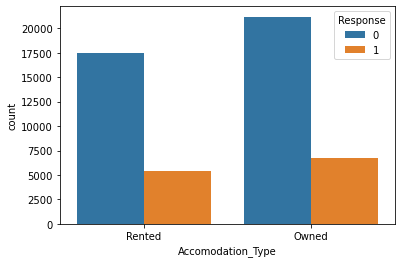

In [18]:
sns.countplot(x='Accomodation_Type',hue='Response',data=health_train);

### Reco_Insurance_Type

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

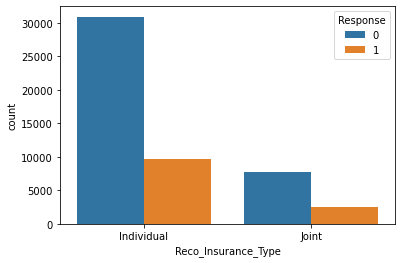

In [19]:
sns.countplot(x='Reco_Insurance_Type', hue='Response',data=health_train)

### Upper_Age

<AxesSubplot:xlabel='Response', ylabel='Upper_Age'>

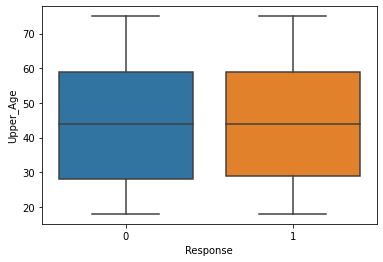

In [20]:
sns.boxplot(y='Upper_Age', x='Response',data=health_train)

### Lower_Age

<AxesSubplot:xlabel='Response', ylabel='Lower_Age'>

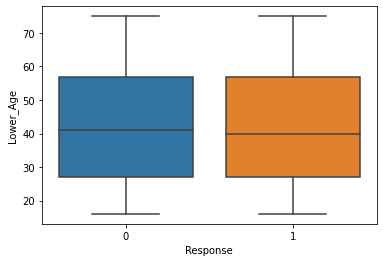

In [21]:
sns.boxplot(y='Lower_Age', x='Response',data=health_train)

### Is_Spouse

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

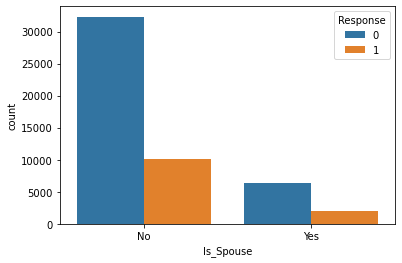

In [22]:
sns.countplot(x='Is_Spouse', hue='Response',data=health_train)

### Reco_Policy_Cat

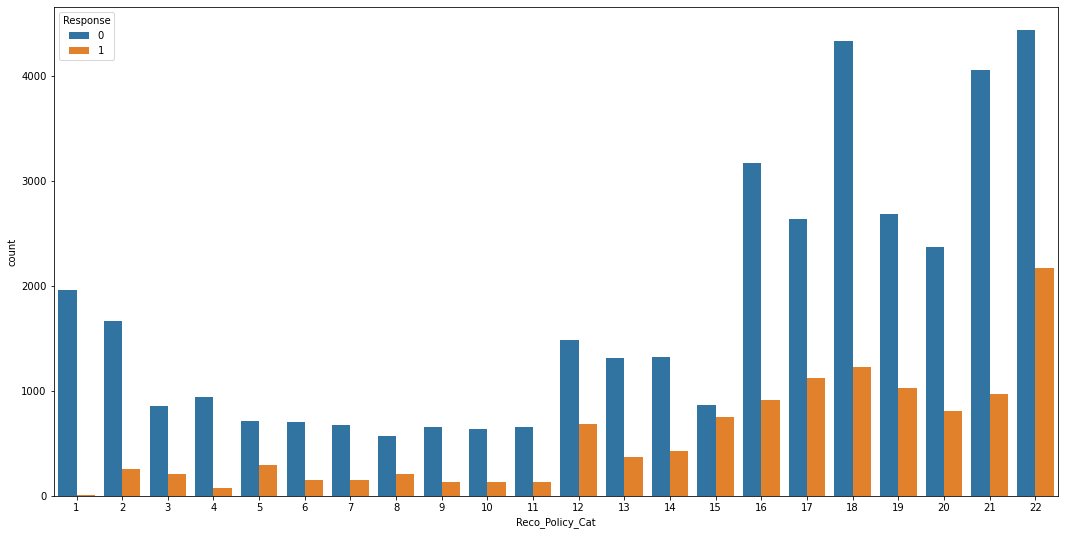

In [23]:
f,ax=plt.subplots(figsize=(18,9))
g=sns.countplot(x='Reco_Policy_Cat',hue='Response',data=health_train);
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

### Response (univariate)

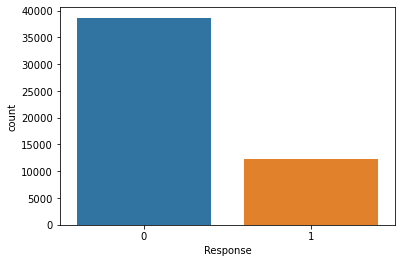

In [24]:
sns.countplot(x='Response',data= health_train);

In [25]:
health_train.dtypes

ID                       int64
Accomodation_Type       object
Reco_Insurance_Type     object
Upper_Age                int64
Lower_Age                int64
Is_Spouse               object
Reco_Policy_Cat          int64
Reco_Policy_Premium    float64
Response                 int64
dtype: object

In [26]:
#one hot encoding each categorical attribute
dummy_tr_1=pd.get_dummies(health_train['Accomodation_Type'],drop_first=True,prefix='AT',prefix_sep='_')
dummy_tr_2=pd.get_dummies(health_train['Reco_Insurance_Type'],drop_first=True,prefix='RIT',prefix_sep='_')
dummy_tr_3=pd.get_dummies(health_train['Is_Spouse'],drop_first=True,prefix='IS',prefix_sep='_')

In [27]:
dummy_ts_1=pd.get_dummies(health_test['Accomodation_Type'],drop_first=True,prefix='AT',prefix_sep='_')
dummy_ts_2=pd.get_dummies(health_test['Reco_Insurance_Type'],drop_first=True,prefix='RIT',prefix_sep='_')
dummy_ts_3=pd.get_dummies(health_test['Is_Spouse'],drop_first=True,prefix='IS',prefix_sep='_')

In [28]:
#concatenating one hot encoded attributes with original train set
health_train=pd.concat([health_train,dummy_tr_1,dummy_tr_2,dummy_tr_3],axis=1)

In [29]:
health_test=pd.concat([health_test,dummy_ts_1,dummy_ts_2,dummy_ts_3],axis=1)


In [30]:
health_train

,ID,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,Response,AT_Rented,RIT_Joint,IS_Yes
0,1,Rented,Individual,36,36,No,22,11628.0,0,1,0,0
1,2,Owned,Joint,75,22,No,22,30510.0,0,0,1,0
2,3,Owned,Individual,32,32,No,19,7450.0,1,0,0,0
3,4,Owned,Joint,52,48,No,19,17780.0,0,0,1,0
4,5,Rented,Individual,44,44,No,16,10404.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,Rented,Individual,22,22,No,18,7704.0,0,1,0,0
50878,50879,Rented,Individual,27,27,No,4,5408.0,0,1,0,0
50879,50880,Rented,Individual,63,63,No,12,11374.0,0,1,0,0
50880,50881,Owned,Joint,71,49,No,16,28179.2,1,0,1,0


In [31]:
health_train = health_train.drop(columns=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'])

In [32]:
health_test = health_test.drop(columns=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'])

## Assinging X and y

In [33]:
X = health_train.drop(columns=['ID','Response'])
y = health_train['Response']

test =health_test.drop(columns=['ID'])

## Train Validation Split

In [34]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,
                                             random_state=77,stratify=y)

In [35]:
y_train.value_counts(normalize=True)

0    0.760058
1    0.239942
Name: Response, dtype: float64

In [36]:
y_val.value_counts(normalize=True)

0    0.760039
1    0.239961
Name: Response, dtype: float64

## Model Building

### Decision Tree

In [75]:
DT_GS=DecisionTreeClassifier()

f1=make_scorer(f1_score,average='macro')

params_grid_DT={'criterion':['gini','entropy'], #2
                'splitter':['best','random'], #2
                'max_depth':[2,3,4,5,6,7,8,9,10], #9
                'max_features':['auto','sqrt','log2',None], #4
                'class_weight':[None,'balanced']} #2

grid_search_DT=GridSearchCV(DT_GS,
                            params_grid_DT,
                            n_jobs=-1,
                            cv=5, scoring=f1)
grid_search_DT.fit(X_train,y_train)
grid_search_DT.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'splitter': 'best'}

In [76]:
Dt=DecisionTreeClassifier(max_depth=9,criterion='gini',class_weight='balanced',max_features=None,splitter='best')
Dt.fit(X_train,y_train)

y_pred_Dt_tr=Dt.predict(X_train)
y_pred_Dt_val=Dt.predict(X_val)

ac_Dt_tr=accuracy_score(y_train,y_pred_Dt_tr)
ac_Dt_val=accuracy_score(y_val,y_pred_Dt_val)

print('Train Accuracy')
print(ac_Dt_tr*100)
print('Validation Accuracy')
print(ac_Dt_val*100)

Train Accuracy
60.134205575989
Validation Accuracy
58.820831968555524


In [79]:
prediction_Dt=Dt.predict(test)

submission=pd.DataFrame({"ID":health_test["ID"],"Response":prediction_Dt})
submission.to_csv('sub_Dt.csv',index=False)

### XG Boost

In [80]:
XGB=xgb.XGBClassifier()
XGB.fit(X_train,y_train)

y_pred_XGB_tr=XGB.predict(X_train)
y_pred_XGB_val=XGB.predict(X_val)

f1_XGB_tr=f1_score(y_train,y_pred_XGB_tr,average='macro')
f1_XGB_val=f1_score(y_val,y_pred_XGB_val,average='macro')

print('Train f1')
print(f1_XGB_tr*100)
print('Val_f1')
print(f1_XGB_val*100)

Train f1
50.974475204392164
Val_f1
46.211765177356135


### Random Forest

In [83]:
RF_GS=RandomForestClassifier()

f1=make_scorer(f1_score,average='macro')

params_grid_RF={'criterion':['gini','entropy'], #2
                'max_depth':[2,3,4,5,6,7,8,9,10], #9
                'max_features':['auto','sqrt','log2',None], #4
                'bootstrap':[True,False], #2
                'class_weight':['balanced','balanced_subsample']} #2

grid_search_RF=GridSearchCV(RF_GS,
                            params_grid_RF,
                            n_jobs=-1,
                            cv=5,
                            scoring=f1)
grid_search_RF.fit(X_train,y_train)
grid_search_RF.best_params_ # among 288

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None}

In [40]:
RF=RandomForestClassifier(bootstrap =True, 
                          class_weight = 'balanced',
                          criterion='gini', 
                          max_depth=10,
                          max_features=None,
                          n_estimators=1000)
RF.fit(X_train,y_train)

y_pred_RF_tr=RF.predict(X_train)
y_pred_RF_val=RF.predict(X_val)

f1_RF_tr=f1_score(y_train,y_pred_RF_tr,average='macro')
f1_RF_val=f1_score(y_val,y_pred_RF_val,average='macro')

print('Train f1')
print(f1_RF_tr*100)
print('Val_f1')
print(f1_RF_val*100)

Train f1
57.964737002438746
Val_f1
53.9178394661984


In [ ]:
prediction_RF=RF.predict(test)

submission=pd.DataFrame({"ID":health_test["ID"],"Response":prediction_RF})
submission.to_csv('sub_RF.csv',index=False)

### Gradient boost

In [ ]:
RF=RandomForestClassifier(bootstrap =True, 
                          class_weight = 'balanced',
                          criterion='gini', 
                          max_depth=10,
                          max_features=None,
                          n_estimators=1000)
RF.fit(X_train,y_train)

y_pred_RF_tr=RF.predict(X_train)
y_pred_RF_val=RF.predict(X_val)

f1_RF_tr=f1_score(y_train,y_pred_RF_tr,average='macro')
f1_RF_val=f1_score(y_val,y_pred_RF_val,average='macro')

print('Train f1')
print(f1_RF_tr*100)
print('Val_f1')
print(f1_RF_val*100)